# LOADING THE DATA AND PREPROCESSING

In [ ]:
# IMPORTING NECCESSARY LIBRARIES

import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# READING THE TRAINING DATA AS WELL AS THE OPENAI TWEETS

data = pd.read_csv("/content/fake_or_real_news.csv")
print(data.head())

tweets = pd.read_csv("/content/tweets_en_processed.csv")
tweets.head()

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


,edit_history_tweet_ids,entities,lang,context_annotations,created_at,author_id,id,public_metrics,text,referenced_tweets,...,username,verified,id_user,created_at_user,name,public_metrics_user,description,location,entities_user,doc_length
0,['1727283455480983665'],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:41.000Z,1586436915313664005,1727283455480983665,"{'retweet_count': 21, 'reply_count': 0, 'like_...",rt whalechart sam altman reinstated openai ceo,"[{'type': 'retweeted', 'id': '1727269109908525...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,['1727283452431806579'],"{'annotations': [{'start': 0, 'end': 9, 'proba...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:41.000Z,1601589613373653000,1727283452431806579,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",sam altman return httpstcoeiagyclhfo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,['1727283451030622574'],"{'mentions': [{'start': 3, 'end': 15, 'usernam...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:40.000Z,1723511895775129600,1727283451030622574,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",rt lnpservices microsoft ceo satya nadella exp...,"[{'type': 'retweeted', 'id': '1727246646390792...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,['1727283449671942610'],"{'mentions': [{'start': 0, 'end': 9, 'username...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:40.000Z,1329828490737233921,1727283449671942610,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",los1990s vkhosla sama openai elonmusk technoje...,"[{'type': 'replied_to', 'id': '172715098691615...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,['1727283445628596546'],"{'mentions': [{'start': 3, 'end': 12, 'usernam...",en,"[{'domain': {'id': '46', 'name': 'Business Tax...",2023-11-22T11:10:39.000Z,1693257780491124736,1727283445628596546,"{'retweet_count': 6676, 'reply_count': 0, 'lik...",rt elonmusk letter openai sent seem like conce...,"[{'type': 'retweeted', 'id': '1727096607752282...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [ ]:
# CHECKING FOR NULL VALUES

data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
# KEEPING ONLY THE TEXT OF OPENAI TWEETS

tweets = tweets[["text","name", "author_id","location","created_at"]]
tweets.head()

,text,name,author_id,location,created_at
0,rt whalechart sam altman reinstated openai ceo,NaN,1586436915313664005,NaN,2023-11-22T11:10:41.000Z
1,sam altman return httpstcoeiagyclhfo,NaN,1601589613373653000,NaN,2023-11-22T11:10:41.000Z
2,rt lnpservices microsoft ceo satya nadella exp...,NaN,1723511895775129600,NaN,2023-11-22T11:10:40.000Z
3,los1990s vkhosla sama openai elonmusk technoje...,NaN,1329828490737233921,NaN,2023-11-22T11:10:40.000Z
4,rt elonmusk letter openai sent seem like conce...,NaN,1693257780491124736,NaN,2023-11-22T11:10:39.000Z


In [ ]:
# PROCESSING DATES OF OPENAI TWEETS

from datetime import datetime

tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['time'] = tweets['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
tweets.head()

,text,name,author_id,location,created_at,time
0,rt whalechart sam altman reinstated openai ceo,NaN,1586436915313664005,NaN,2023-11-22 11:10:41+00:00,2023-11-22 11:10:41
1,sam altman return httpstcoeiagyclhfo,NaN,1601589613373653000,NaN,2023-11-22 11:10:41+00:00,2023-11-22 11:10:41
2,rt lnpservices microsoft ceo satya nadella exp...,NaN,1723511895775129600,NaN,2023-11-22 11:10:40+00:00,2023-11-22 11:10:40
3,los1990s vkhosla sama openai elonmusk technoje...,NaN,1329828490737233921,NaN,2023-11-22 11:10:40+00:00,2023-11-22 11:10:40
4,rt elonmusk letter openai sent seem like conce...,NaN,1693257780491124736,NaN,2023-11-22 11:10:39+00:00,2023-11-22 11:10:39


In [ ]:
# PREPARING THE TRAINING DATA

def process(data):

    data = data.drop_duplicates()
    data = data[:10000]
    data = data[["title", "label"]]
    data = data.rename({"title":"News", "label":"Real"},axis = 1)
    data["Real"] = data["Real"].replace({"FAKE":0, "REAL":1})

    return data

data = process(data)

print("Data after renaming and dropping some cols:")
data.head()

Data after renaming and dropping some cols:


,News,Real
0,You Can Smell Hillary’s Fear,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matters,1


In [ ]:
data.shape

(6335, 2)

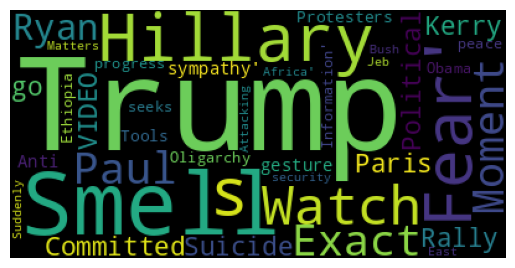

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING A OWRDCLOUD TO CHECK FREQUENT WORDS IN THE TRAINING DATA

from wordcloud import WordCloud

def create_wordcloud(data, column):
    words = data[column].values
    wordcloud = WordCloud().generate(str(words))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.figure(figsize = (40,40), facecolor = None)

create_wordcloud(data, 'News')

# TEXT PREPROCESSING AND VECTORIZATION

In [ ]:
# IMPORTING LIBRARIES FOR DATA PREPROCESSING

!pip install textacy
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = [stopwords.words('english')]

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

from textacy import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# PERFORMING THE DATA PREPROCESSING STEPS TO THE TEXTUAL DATA


def preprocess_text(data, column):

    # CONVERTING THE TEXT TO LOWERCASE
    data[column] = data[column].str.lower()

    # REMOVING THE STOPWORDS
    data[column] = data[column].apply(lambda x: ' '.join([i for i in x.split() if i not in stopwords]))

    # REMOVING EXTRA PUNCTUATIONS
    data[column] = data[column].apply(lambda x: preprocessing.remove.punctuation(x))

    # NORMALIZING WHITESPACES
    data[column] = data[column].apply(lambda x: preprocessing.normalize.whitespace(x))

    # REMOVING HASHTAGS
    data[column] = data[column].apply(lambda x: preprocessing.replace.hashtags(x))

    # STEMMING THE WORDS TO ROOT FORM
    data[column] = data[column].apply(lambda x: stemmer.stem(x))

    return data

data = preprocess_text(data, 'News')
data.head()

,News,Real
0,you can smell hillary s fear,0
1,watch the exact moment paul ryan committed pol...,0
2,kerry to go to paris in gesture of sympathi,1
3,bernie supporters on twitter erupt in anger ag...,0
4,the battle of new york why this primary matt,1


In [ ]:
tweets.head()

,text
0,rt whalechart sam altman reinstated openai ceo
1,sam altman return httpstcoeiagyclhfo
2,rt lnpservices microsoft ceo satya nadella exp...
3,los1990s vkhosla sama openai elonmusk technoje...
4,rt elonmusk letter openai sent seem like conce...


In [ ]:
# CREATING TF-IDF VECTORS FOR THE WORDS

from sklearn.feature_extraction.text import TfidfVectorizer

train_data = data['News'].tolist()
prediction_data = tweets['text'].tolist()

vectorizer = TfidfVectorizer()

corpus = train_data.copy()
corpus.extend(prediction_data)

vectorizer.fit(corpus)

news_tf = vectorizer.transform(train_data).toarray()
tweets_tf = vectorizer.transform(prediction_data).toarray()

In [ ]:
len(news_tf)

6335

In [ ]:
len(data)

6335

# FITTING MACHINE LEARNING CLASSIFIERS TO THE MODELS

In [ ]:
# IMPORTING LIBRARIES NECCESSARY FOR THE MACHINE LEARNING PART

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# SEPERATING OUT THE DATA INTO TRAINING AND TEST SETS

y = data[["Real"]]

x_train, x_test = news_tf[:6000], news_tf[6000:]
y_train, y_test = y[:6000], y[6000:]

In [ ]:
# FITTING A LOGISTIC REGRESSION MODEL TO THE DATA

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

y_pred_lgr = lgr.predict(x_test)

accuracy_score(y_pred_lgr, y_test)

0.8537313432835821

In [ ]:
# FITTING A NAIVE BAYES ALGORITHM TO THE DATA

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)

accuracy_score(y_test, y_pred_nb)

0.835820895522388

In [ ]:
# FITTING A KNN MODEL TO THE DATA

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.7880597014925373

In [ ]:
# FITTING A DECISION TREE MODEL TO THE DATA

dt_model = DecisionTreeClassifier(max_depth = 5)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

accuracy_score(y_test, y_pred_dt)

0.6358208955223881

Text(0, 0.5, 'Accuracy Score')

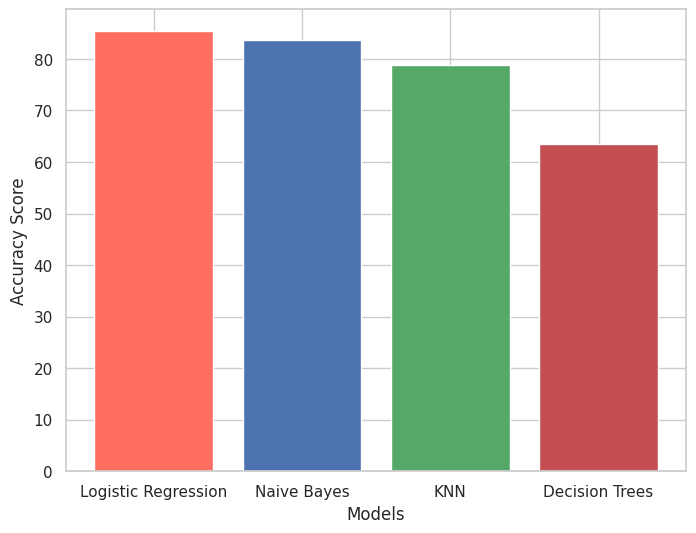

In [ ]:
# PRINTING A VISUALISATION TO COMPARE THE ACCURACY SCORES OF THE MODELS

accuracy_scores = [(accuracy_score(y_pred_lgr, y_test))*100, accuracy_score(y_test, y_pred_nb)*100, accuracy_score(y_test, y_pred_knn)*100, accuracy_score(y_test, y_pred_dt)*100]
classifiers = ["Logistic Regression", "Naive Bayes", "KNN", "Decision Trees"]
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(x=classifiers, height=accuracy_scores, color = ["#FF6F61", "#4C72B0", "#55A868", "#C44E52"])

plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# FURTHER ANALYSIS FOR THE FAKE NEWS IN OPENAI TWEETS

In [ ]:
# USING LOGISTIC REGRESSION MODEL TO PREDICT FAKE NEWS FOR THE OPENAI TWEETS

fake = lgr.predict(tweets_tf)
tweets["Fake"] = fake

tweets.head()

,text,name,author_id,location,created_at,time,Fake
0,rt whalechart sam altman reinstated openai ceo,NaN,1586436915313664005,NaN,2023-11-22 11:10:41+00:00,2023-11-22 11:10:41,0
1,sam altman return httpstcoeiagyclhfo,NaN,1601589613373653000,NaN,2023-11-22 11:10:41+00:00,2023-11-22 11:10:41,0
2,rt lnpservices microsoft ceo satya nadella exp...,NaN,1723511895775129600,NaN,2023-11-22 11:10:40+00:00,2023-11-22 11:10:40,0
3,los1990s vkhosla sama openai elonmusk technoje...,NaN,1329828490737233921,NaN,2023-11-22 11:10:40+00:00,2023-11-22 11:10:40,0
4,rt elonmusk letter openai sent seem like conce...,NaN,1693257780491124736,NaN,2023-11-22 11:10:39+00:00,2023-11-22 11:10:39,0


In [ ]:
# KEEPING ONLY FAKE NEWS FOR ANALYSIS

fake_news = tweets[tweets['Fake']==1]
real_news = tweets[tweets['Fake']==0]

fake_news.head()

,text,name,author_id,location,created_at,time,Fake
10,openai reach deal principle sam altman return ...,NaN,19485870,NaN,2023-11-22 11:10:35+00:00,2023-11-22 11:10:35,1
15,rt josemiguelcacho shakeup openai underscore n...,NaN,1275487466,NaN,2023-11-22 11:10:33+00:00,2023-11-22 11:10:33,1
16,rt sama love openai everything ’ done past day...,NaN,43387220,NaN,2023-11-22 11:10:32+00:00,2023-11-22 11:10:32,1
23,rt sama love openai everything ’ done past day...,NaN,1376287908458553356,NaN,2023-11-22 11:10:29+00:00,2023-11-22 11:10:29,1
58,rt sama love openai everything ’ done past day...,NaN,1482875942670422017,NaN,2023-11-22 11:10:11+00:00,2023-11-22 11:10:11,1


Text(0, 0.5, 'No. of Tweets')

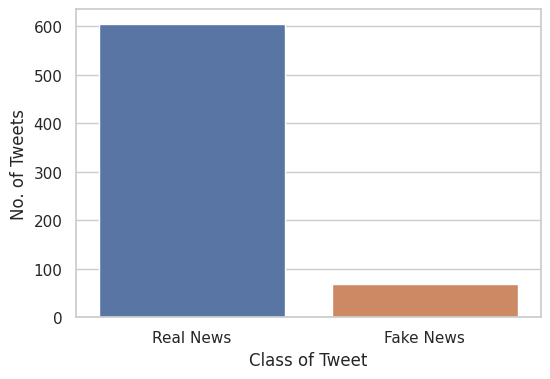

In [ ]:
# CHECKING DISTRIBUTION OF DAKE VS REAL NEWS

class_counts = tweets['Fake'].value_counts()
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.barplot(x = ["Real News", "Fake News"], y=class_counts)

plt.xlabel('Class of Tweet')
plt.ylabel('No. of Tweets')

In [ ]:
import re
def quotes(sentence):
    pattern = r"[‘’'`ʻ´ʼ]"
    return re.sub(pattern, "", sentence)
fake_news['text'] = fake_news['text'].apply(lambda x: quotes(x))

In [ ]:
# PRINITING NUMBER OF FAKE AND REAL TWEETS

tweets["Fake"].value_counts()

0    605
1     68
Name: Fake, dtype: int64

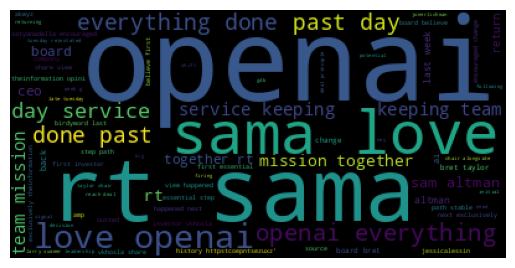

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CHECKING MOST FREQ. WORDS IN THE FAKE NEWS

def create_wordcloud(data, column):
    words = data[column].values
    wordcloud = WordCloud().generate(str(words))

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.figure(figsize = (40,40), facecolor = None)

create_wordcloud(fake_news, 'text')

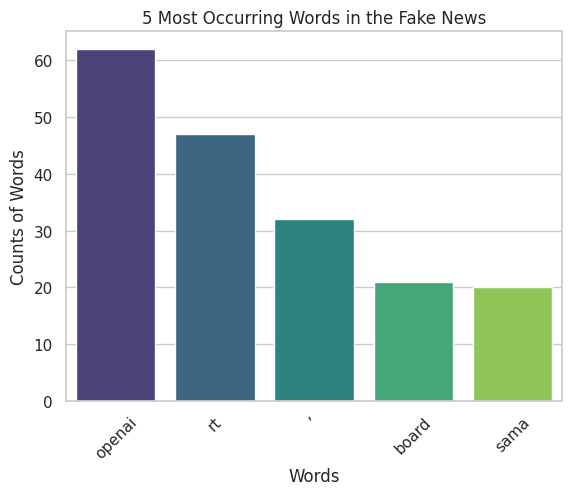

In [ ]:
# PRINTING TOP 5 WORDS IN THE FAKE NEWS AND IN THE REAL NEWS

words = fake_news['text'].str.split().explode()
word_counts = words.value_counts().head(5)
word_counts = word_counts.sort_values(ascending=False)
sns.barplot(x=word_counts.index, y=word_counts.values, palette='viridis')
plt.title("5 Most Occurring Words in the Fake News")
plt.xlabel("Words")
plt.ylabel("Counts of Words")
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Counts')

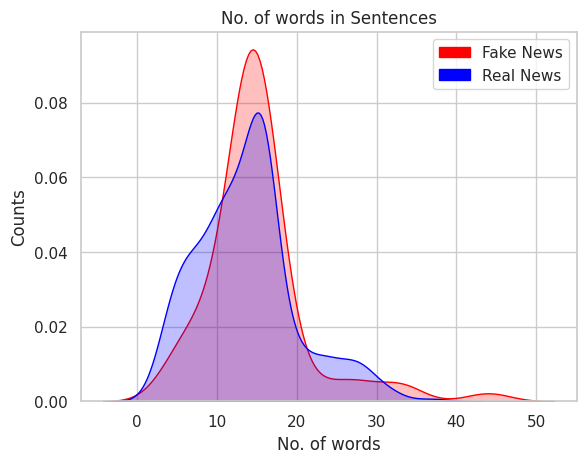

In [ ]:
# PRINTING KDE PLOT TO FURTHER ANALYSE DIFFERENCE IN NUMBER OF WORDS IN REAL AND FAKE NEWS FROM OPEN AI NEWS

import matplotlib.patches as mpatches

fake_news['words'] = fake_news['text'].str.split().str.len()
real_news['words'] = real_news['text'].str.split().str.len()

sns.kdeplot(fake_news['words'], fill = True, color = 'red')
sns.kdeplot(real_news['words'], fill = True, color = 'blue')

red_patch = mpatches.Patch(color='red', label='Fake News')
blue_patch = mpatches.Patch(color='blue', label='Real News')
plt.legend(handles=[red_patch, blue_patch])

plt.title("No. of words in Sentences")
plt.xlabel("No. of words")
plt.ylabel("Counts")

Text(0, 0.5, 'No. of Chars.')

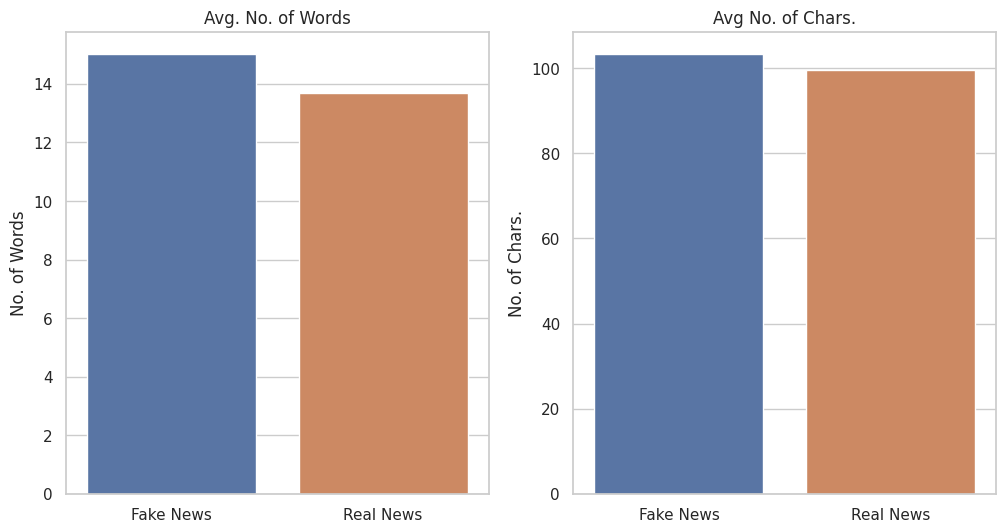

In [ ]:
# COMPARING AVERAGE NUMBER OF WORDS AND CHARACTERS BETWEEN REAL AND FAKE NEWS

fake_news['num_word'] = fake_news['text'].str.split().str.len()
fake_news['num_char'] = fake_news['text'].str.len()
real_news['num_word'] = real_news['text'].str.split().str.len()
real_news['num_char'] = real_news['text'].str.len()

fake_avg_words = fake_news['num_word'].mean()
fake_avg_chars = fake_news['num_char'].mean()
real_avg_words = real_news['num_word'].mean()
real_avg_chars = real_news['num_char'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=['Fake News', 'Real News'], y=[fake_avg_words, real_avg_words])
plt.title('Avg. No. of Words')
plt.ylabel('No. of Words')

plt.subplot(1, 2, 2)
sns.barplot(x=['Fake News', 'Real News'], y=[fake_avg_chars, real_avg_chars])
plt.title('Avg No. of Chars.')
plt.ylabel('No. of Chars.')

Text(0, 0.5, 'Number of Fake News Tweets')

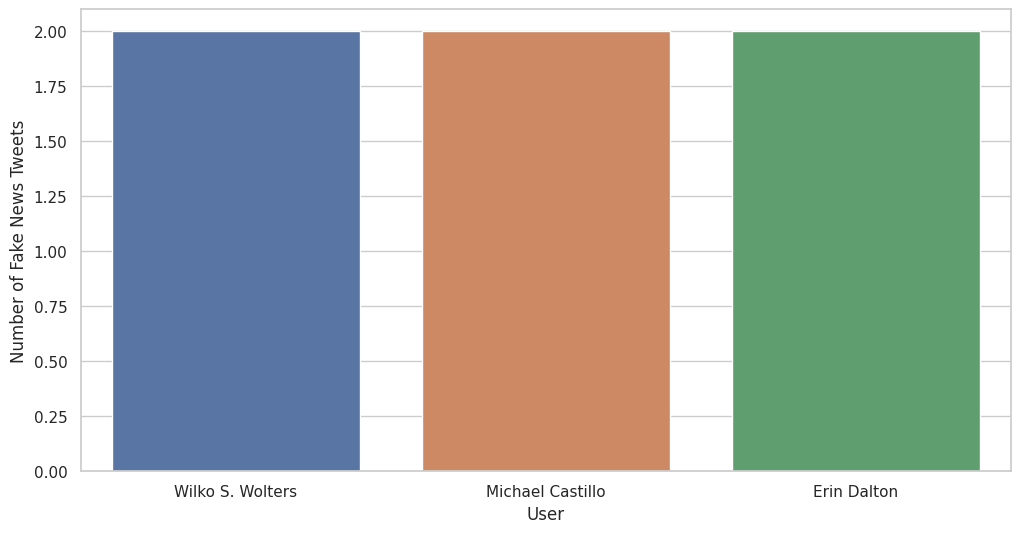

In [ ]:
# TOP 5 USERS WITH HIGHEST NUMBER OF FAKE TWEETS, AS NAME WAS NOT AVAILABLE FOR MOST USERS

user_counts = fake_news['name'].value_counts()

top_users = user_counts.head(3)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_users.index, y=top_users.values)

plt.xlabel('User')
plt.ylabel('Number of Fake News Tweets')

In [ ]:
fake_news['time']

10    2023-11-22 11:10:35
15    2023-11-22 11:10:33
16    2023-11-22 11:10:32
23    2023-11-22 11:10:29
58    2023-11-22 11:10:11
              ...        
590   2023-11-22 16:30:24
615   2023-11-22 16:31:05
623   2023-11-22 16:31:09
624   2023-11-22 16:31:09
629   2023-11-22 16:31:12
Name: time, Length: 68, dtype: datetime64[ns]

Text(0, 0.5, 'No of Fake Tweets')

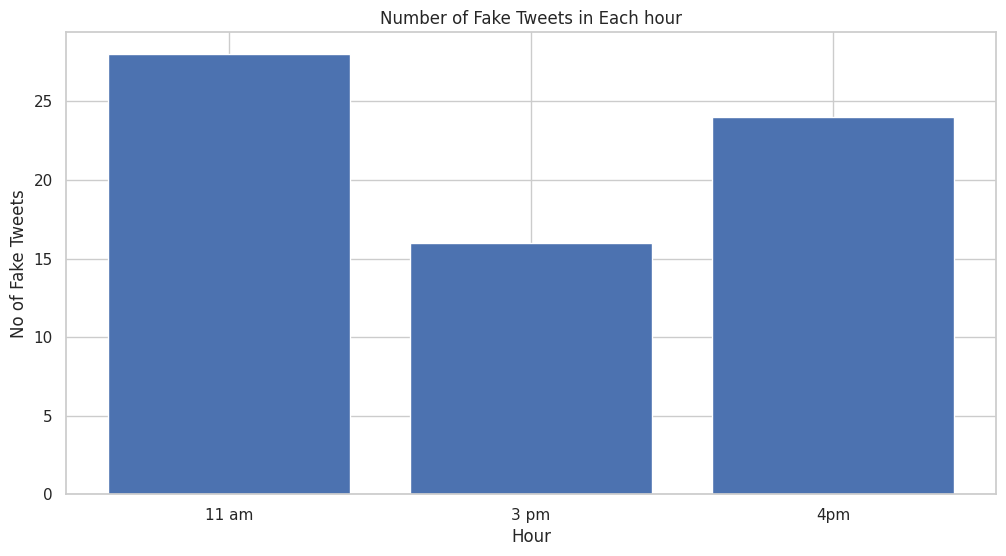

In [ ]:
# ANALYSING NUMBER OF FAKE TWEETS IN EACH HOUR

fake_news['time'] = pd.to_datetime(fake_news['time'])

f_data = fake_news[fake_news['time'].dt.hour.isin([11, 15, 16])]

tweets_by_hour = f_data.groupby(f_data['time'].dt.hour).size()

plt.figure(figsize=(12, 6))
plt.bar(['11 am', '3 pm', '4pm'], tweets_by_hour.values)
plt.title('Number of Fake Tweets in Each hour')
plt.xlabel('Hour')
plt.ylabel('No of Fake Tweets')